In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


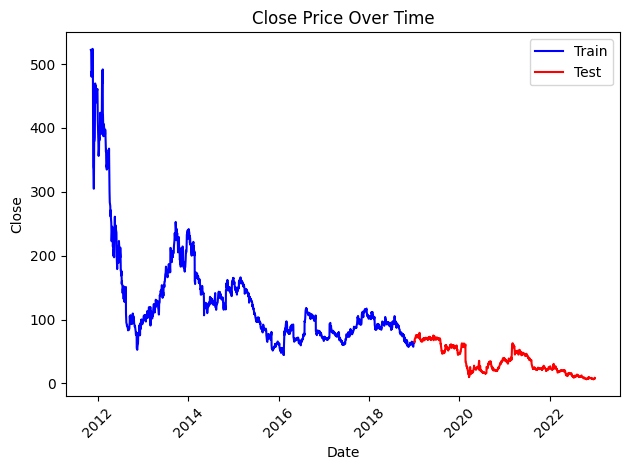

In [2]:
#AAPL
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GRPN',start_date,end_date,period,2019)
data.data_preprocess()

In [3]:
data.data_period = "train"
print("Train period:")
data.comparison_metrics()
data.buy_and_hold()
print("\n")
data.data_period = "test"
print("Test period:")
data.comparison_metrics()
data.buy_and_hold()

Train period:
Return: -0.6900656901919597
Portfolio MDD: 0.8256766999743
Portfolio Std Dev: 0.16143984200666853
Buy and Hold Strategy Profit: -0.82.
Buy and Hold Strategy MDD   : 1.02.


Test period:
Return: -0.8270424570068216
Portfolio MDD: 1.0712733510658738
Portfolio Std Dev: 0.22813863132504142
Buy and Hold Strategy Profit: -0.89.
Buy and Hold Strategy MDD   : 0.85.


In [11]:


# Calculate the monthly returns as the percentage change in price
monthly_returns = data.strategy_performance()

# Calculate the cumulative returns
cumulative_returns = (1 + monthly_returns).cumprod()
# Calculate the profit as the difference between the final cumulative return and 1 (initial investment)
profit = cumulative_returns.iloc[-1]-1
cumulative_max = cumulative_returns.cummax()
drawdown = cumulative_max - cumulative_returns
max_drawdown = drawdown.max()
cumulative_max


,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10,TS11,TS12
0,1.158035,1.157236,1.188369,1.092820,1.155359,1.179541,1.122629,1.155359,1.098079,1.157236,1.206799,1.172538
1,1.281312,1.280429,1.314876,1.209155,1.278352,1.179541,1.242138,1.278352,1.214975,1.280429,1.335268,1.172538
2,1.281312,1.280429,1.314876,1.209155,1.278352,1.179541,1.242138,1.278352,1.214975,1.280429,1.335268,1.197679
3,1.281312,1.280429,1.314876,1.209155,1.278352,1.179541,1.242138,1.278352,1.214975,1.280429,1.335268,1.197679
4,1.281312,1.340939,1.377014,1.236185,1.278352,1.179541,1.242138,1.278352,1.272392,1.340939,1.398370,1.328180
...,...,...,...,...,...,...,...,...,...,...,...,...
71,4.042726,5.821418,5.978029,5.479723,2.948801,1.324471,4.644661,2.948801,5.523832,6.077527,6.070741,3.479977
72,4.385264,6.576324,6.753245,6.190319,3.081991,1.324471,5.038200,3.081991,6.240148,6.865646,6.857979,3.479977
73,4.385264,6.576324,6.753245,6.190319,3.081991,1.324471,5.038200,3.081991,6.240148,6.865646,6.857979,3.495629
74,4.385264,6.576324,6.753245,6.190319,3.081991,1.324471,5.038200,3.081991,6.240148,6.865646,6.857979,3.495629


In [3]:
ga = IslandGGA(data=data.train_data,num_iter=20,num_islands=2,pSize=50,strategies=data.top_strategy_names,evolve_strategy="ring")
ga.evolve()

Running ring
Generation 1: Best fitness = 0.637693537972301  Average Fitness = 0.0679389353807865
Generation 2: Best fitness = 1.086290411299903  Average Fitness = 0.36196835524020055
Generation 3: Best fitness = 1.1496592322828991  Average Fitness = 0.5882695961824651
Generation 4: Best fitness = 1.1496592322828991  Average Fitness = 0.7671585145938431
Generation 5: Best fitness = 1.1496592322828991  Average Fitness = 0.8146453776354899
Generation 6: Best fitness = 1.1496592322828991  Average Fitness = 0.9399791499300294
Generation 7: Best fitness = 1.4257171259734431  Average Fitness = 1.06781193865199
Generation 8: Best fitness = 1.7016167372600166  Average Fitness = 1.12017369992263
Generation 9: Best fitness = 1.7016167372600166  Average Fitness = 1.2056135115757394
Generation 10: Best fitness = 1.7016167372600166  Average Fitness = 1.2397237766073872
Island 0 Migration -Left island 1 -Right island 1
Island 1 Migration -Left island 0 -Right island 0
Generation 11: Best fitness = 1

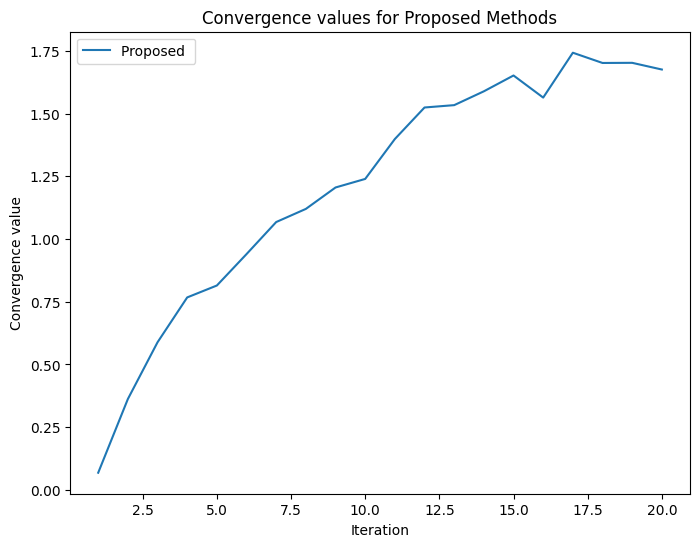

In [4]:
# Plot the convergence values for each evolutionary strategy
plt.figure(figsize=(8, 6))

plt.plot(np.arange(1, 21), ga.convergence_values, label='Proposed ')
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for Proposed Methods')
plt.legend()
plt.show()

/var/folders/cr/n4y2l15s6r3bw_6rj2fcl7xr0000gn/T/ipykernel_59583/1430755632.py:22: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, (strategy, returns) in enumerate(monthly_returns.iteritems()):


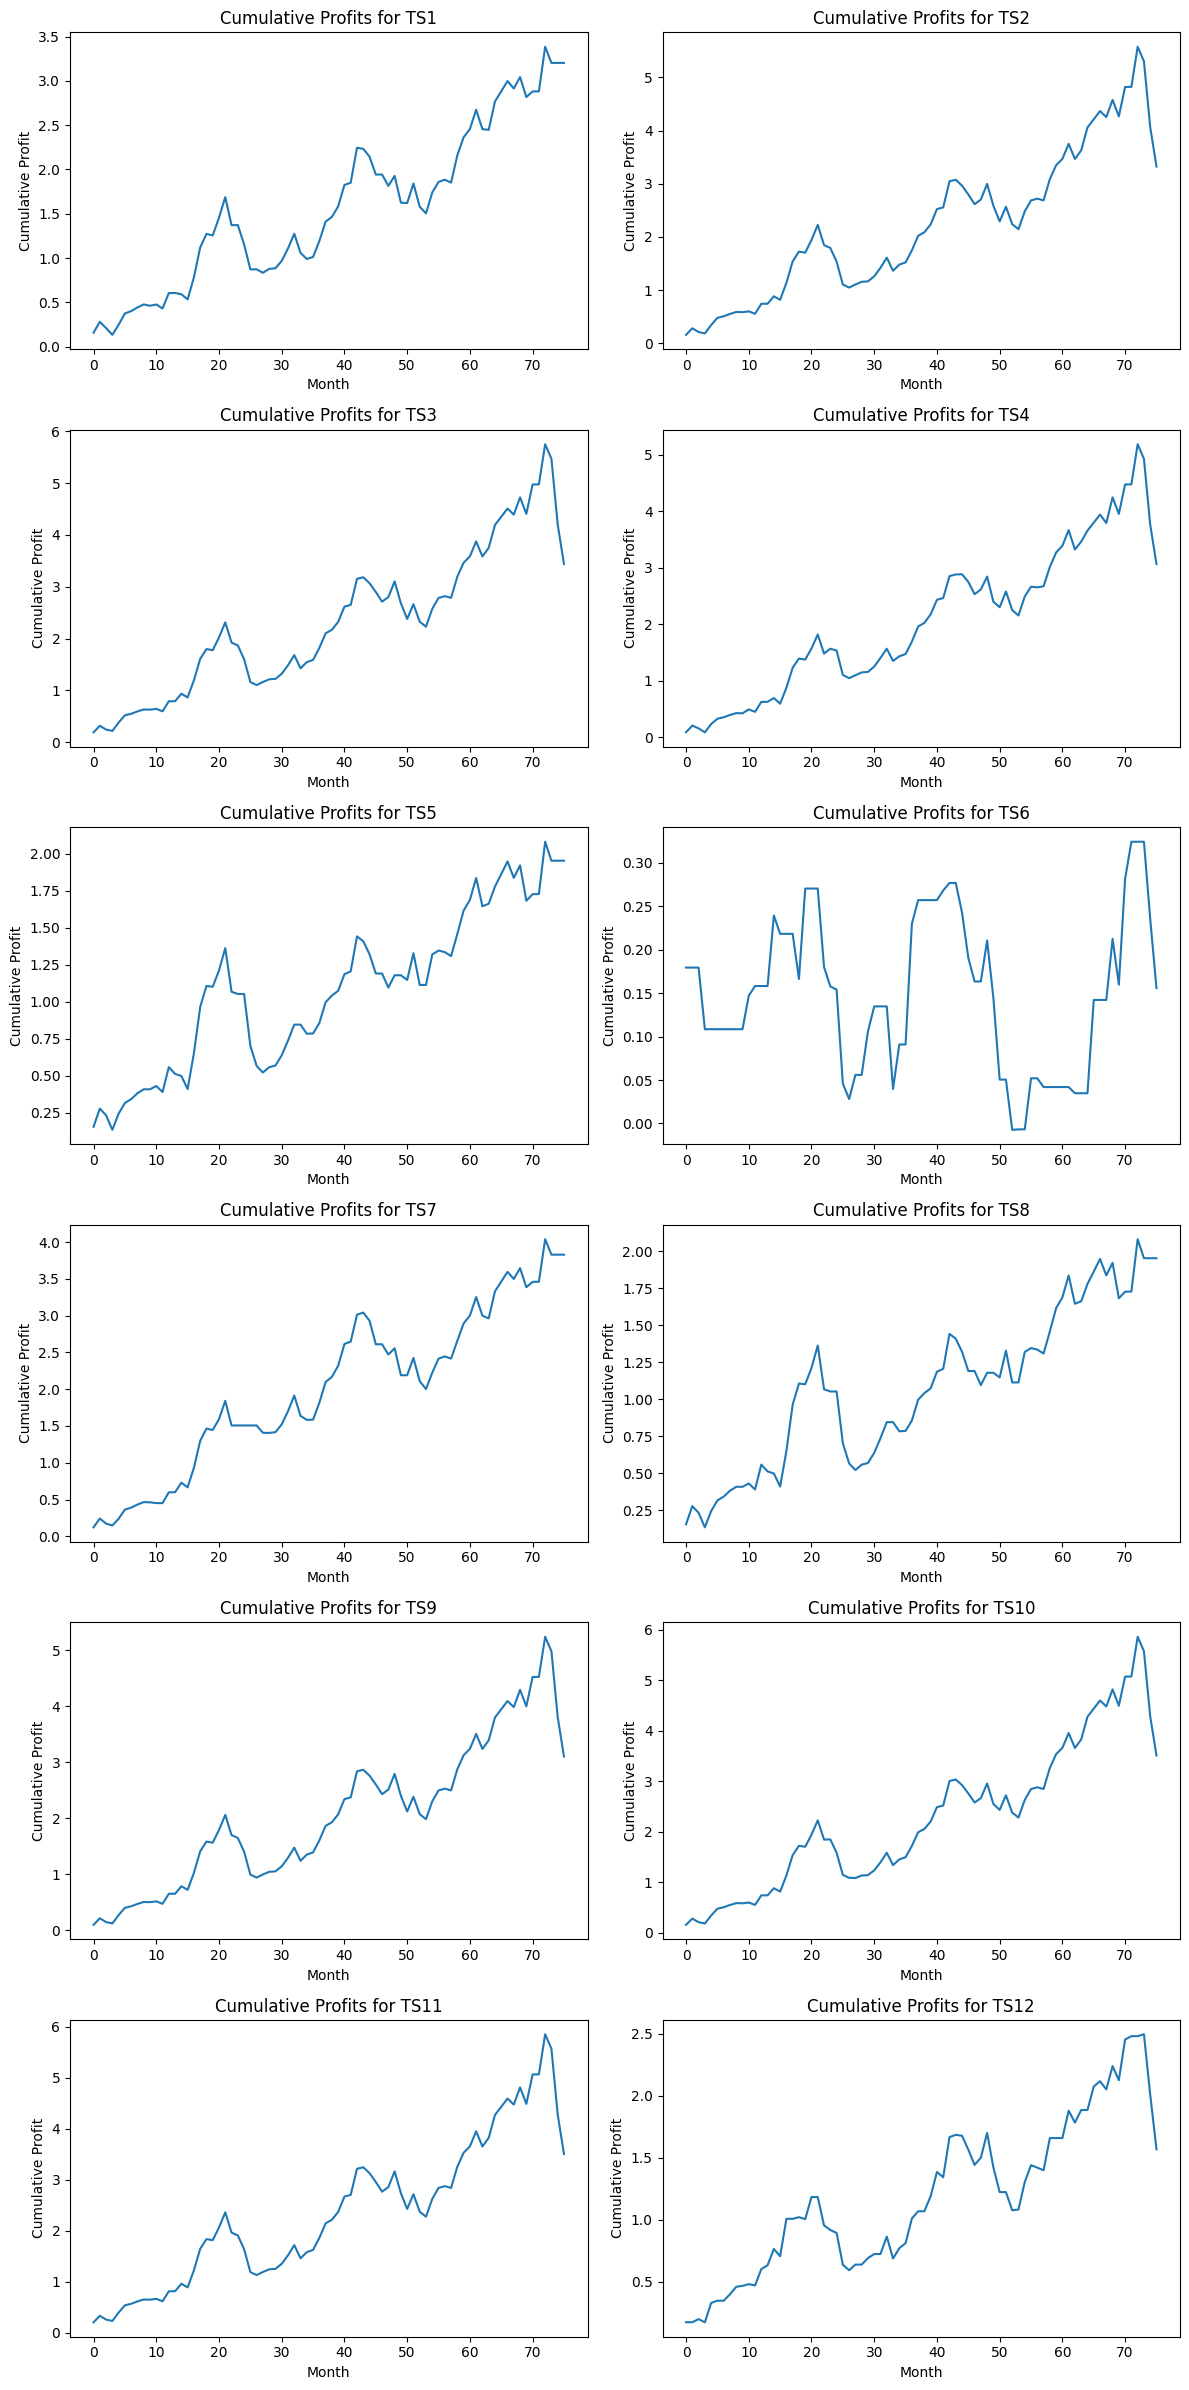

In [19]:


# Monthly returns for each strategy
monthly_returns = data.strategy_performance()


# Determine the grid dimensions
num_strategies = len(monthly_returns.columns)
grid_rows = int(num_strategies / 2)  # Number of rows in the grid
grid_cols = 2  # Number of columns in the grid

# Adjust the figure size based on the number of subplots
fig_width = 12
fig_height = 4 * grid_rows

# Create the subplots with the specified grid dimensions and figure size
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(fig_width, fig_height))

# Flatten the axes array if necessary
if grid_rows > 1:
    axes = axes.flatten()

# Iterate over each strategy and plot its cumulative profits
for idx, (strategy, returns) in enumerate(monthly_returns.iteritems()):
    cumulative_profits = np.cumprod(1 + returns)-1  # Calculate cumulative profits
    ax = axes[idx] if grid_rows > 1 else axes  # Select the correct subplot
    ax.plot(cumulative_profits)
    ax.set_xlabel('Month')
    ax.set_ylabel('Cumulative Profit')
    ax.set_title(f'Cumulative Profits for {strategy}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


